In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from corner import corner
import model_bayesian as model
import emcee
from multiprocess import Pool
from scipy import stats
import scienceplots
plt.style.use('science')

In [2]:
os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
backend = emcee.backends.HDFBackend('model_1.h5')

In [4]:
lnp = backend.get_log_prob()

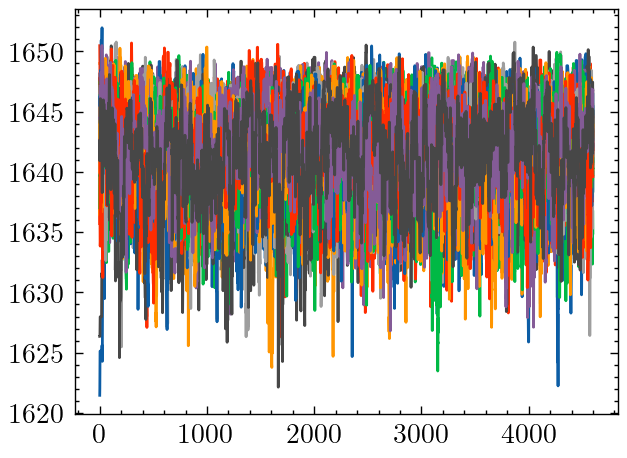

In [13]:
nb = 400
min_lnp = 1500

good_walkers = np.where(np.min(lnp[nb:], axis=0) > min_lnp)[0]

fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(lnp[nb:, good_walkers]);

In [14]:
chain = backend.get_chain(discard=nb)[:, good_walkers, :]

In [15]:
chain.shape

(4600, 34, 23)

In [16]:
nt = int(np.round(np.max(emcee.autocorr.integrated_time(chain))))

In [17]:
# nt = 50
nd = model.azr.config.nd

In [18]:
flat_chain = chain[::nt, :, :].reshape(-1, nd)

In [19]:
from corner import corner

In [20]:
nrpar = model.azr.config.n1

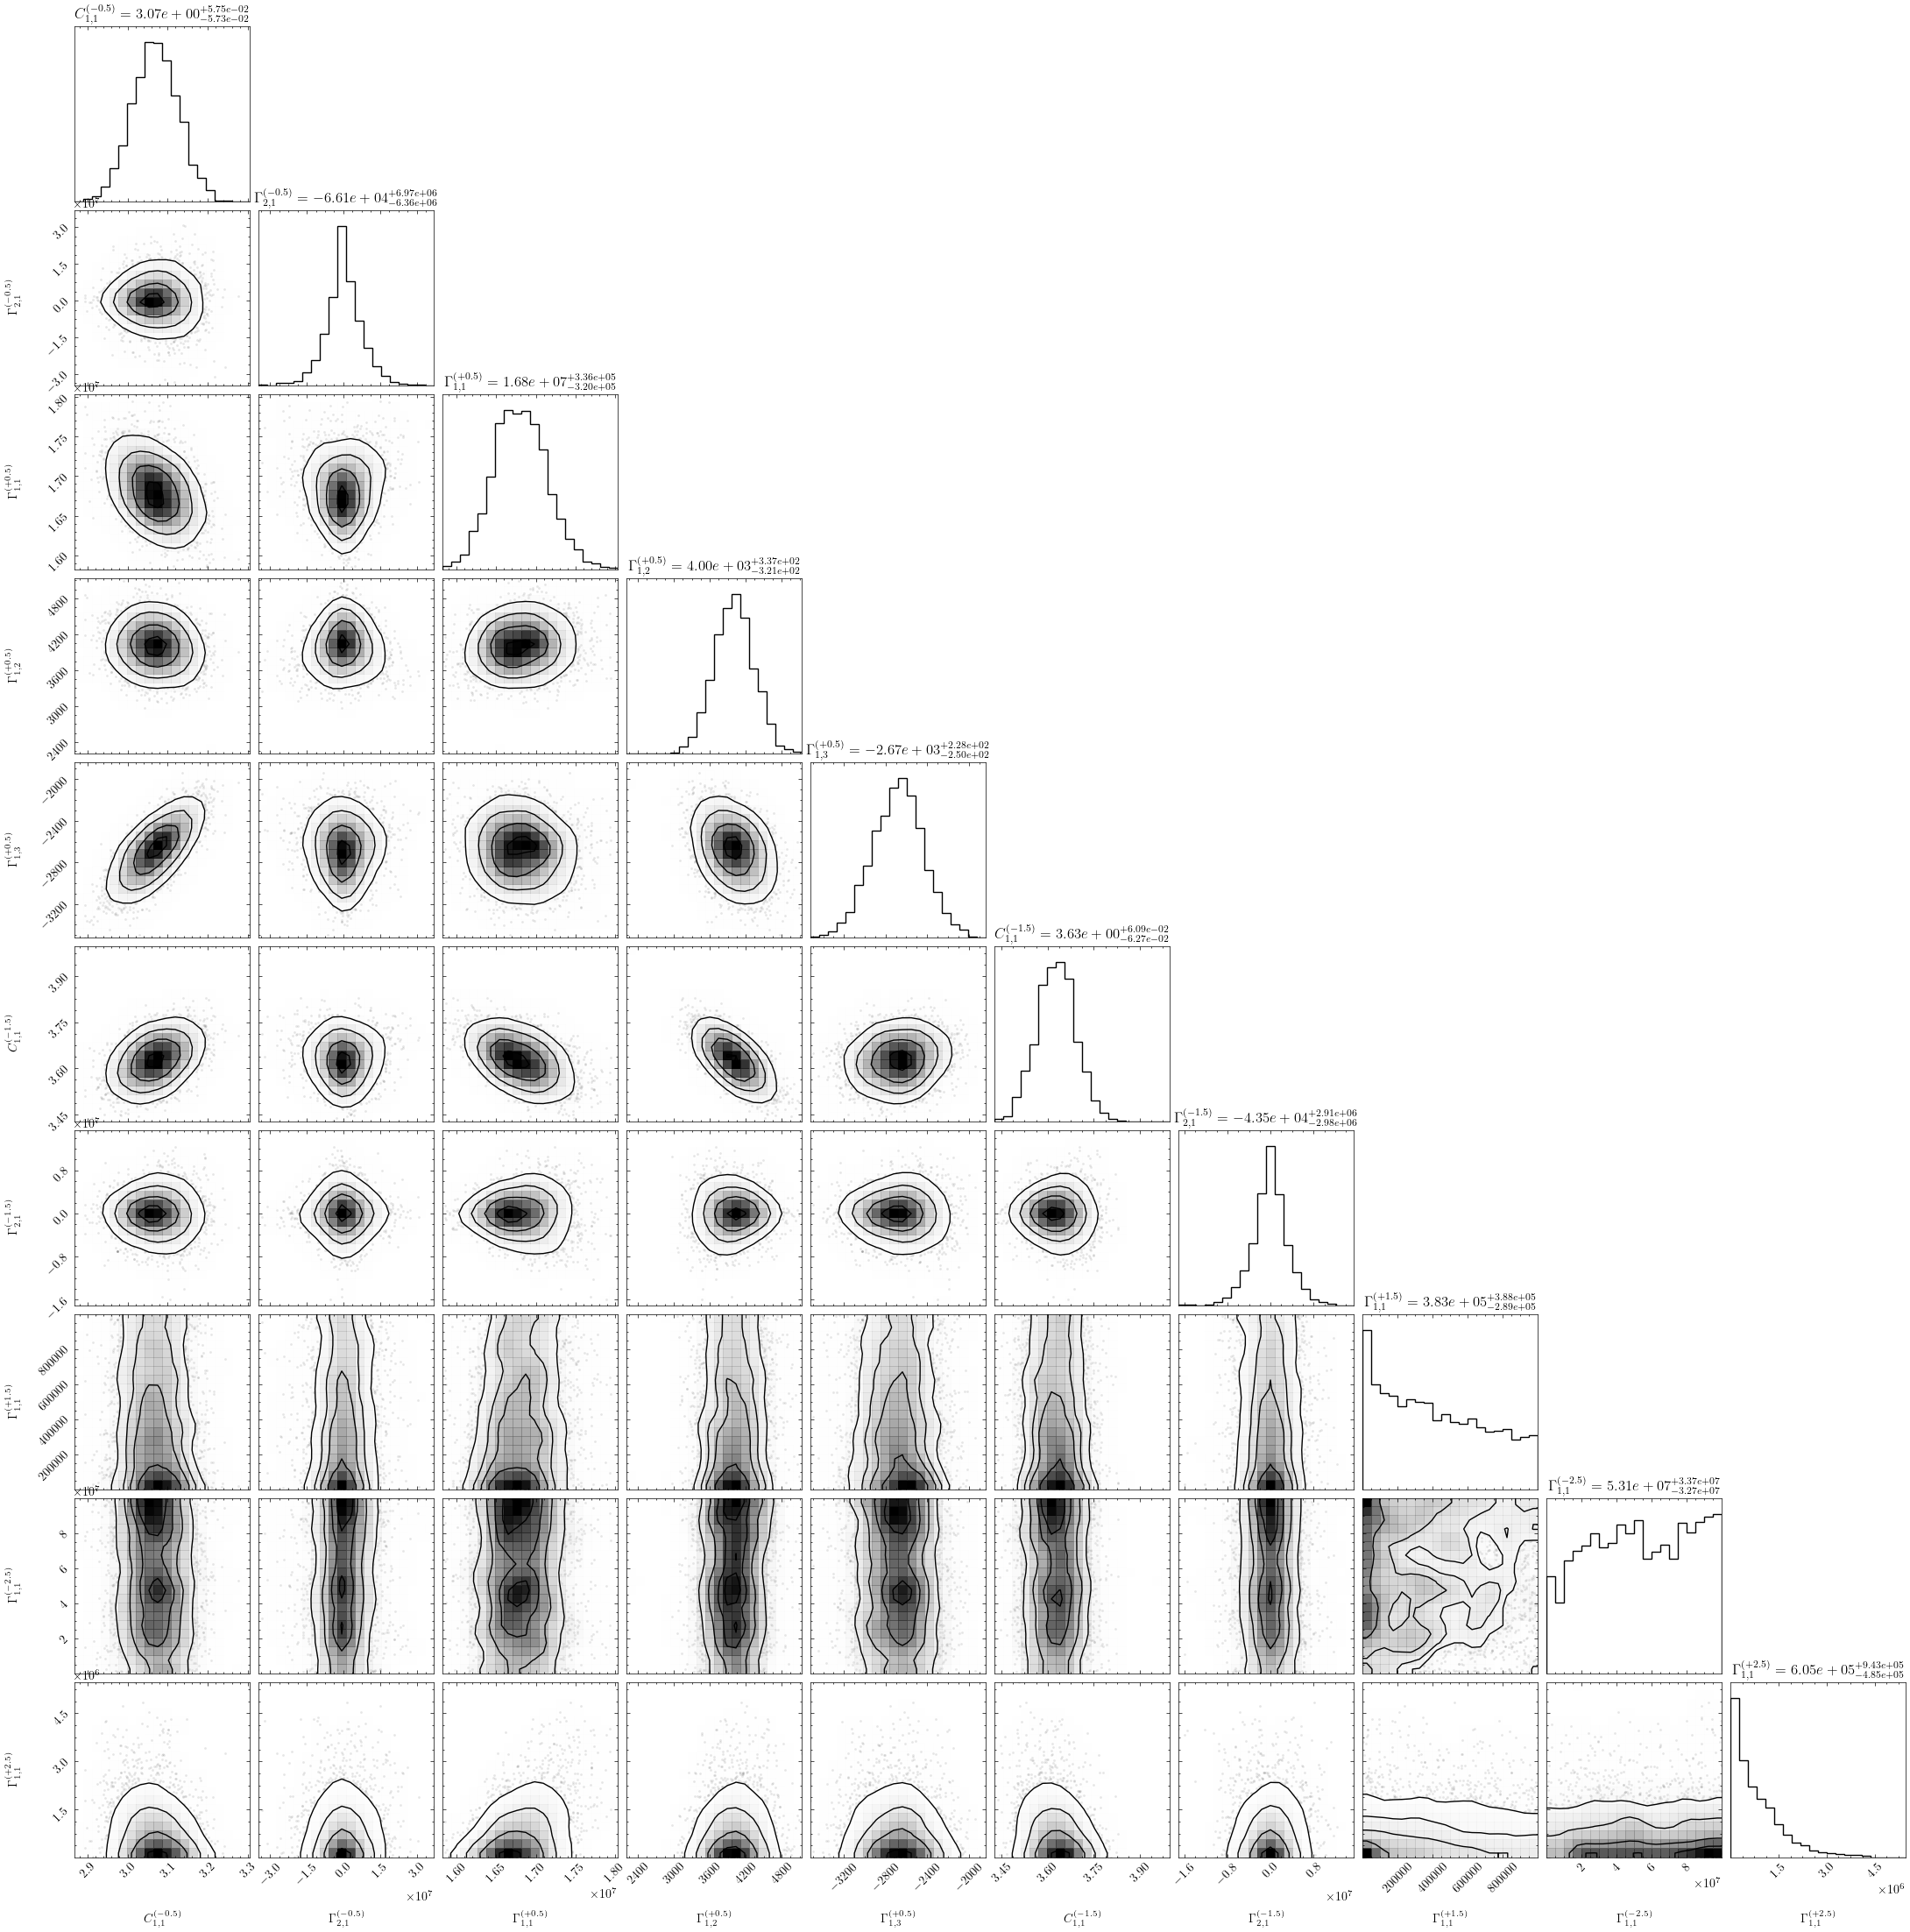

In [ ]:
fig = corner(flat_chain[:, :nrpar], show_titles=True, smooth=True, labels=model.azr.config.labels[:nrpar],
             title_fmt='.2e')

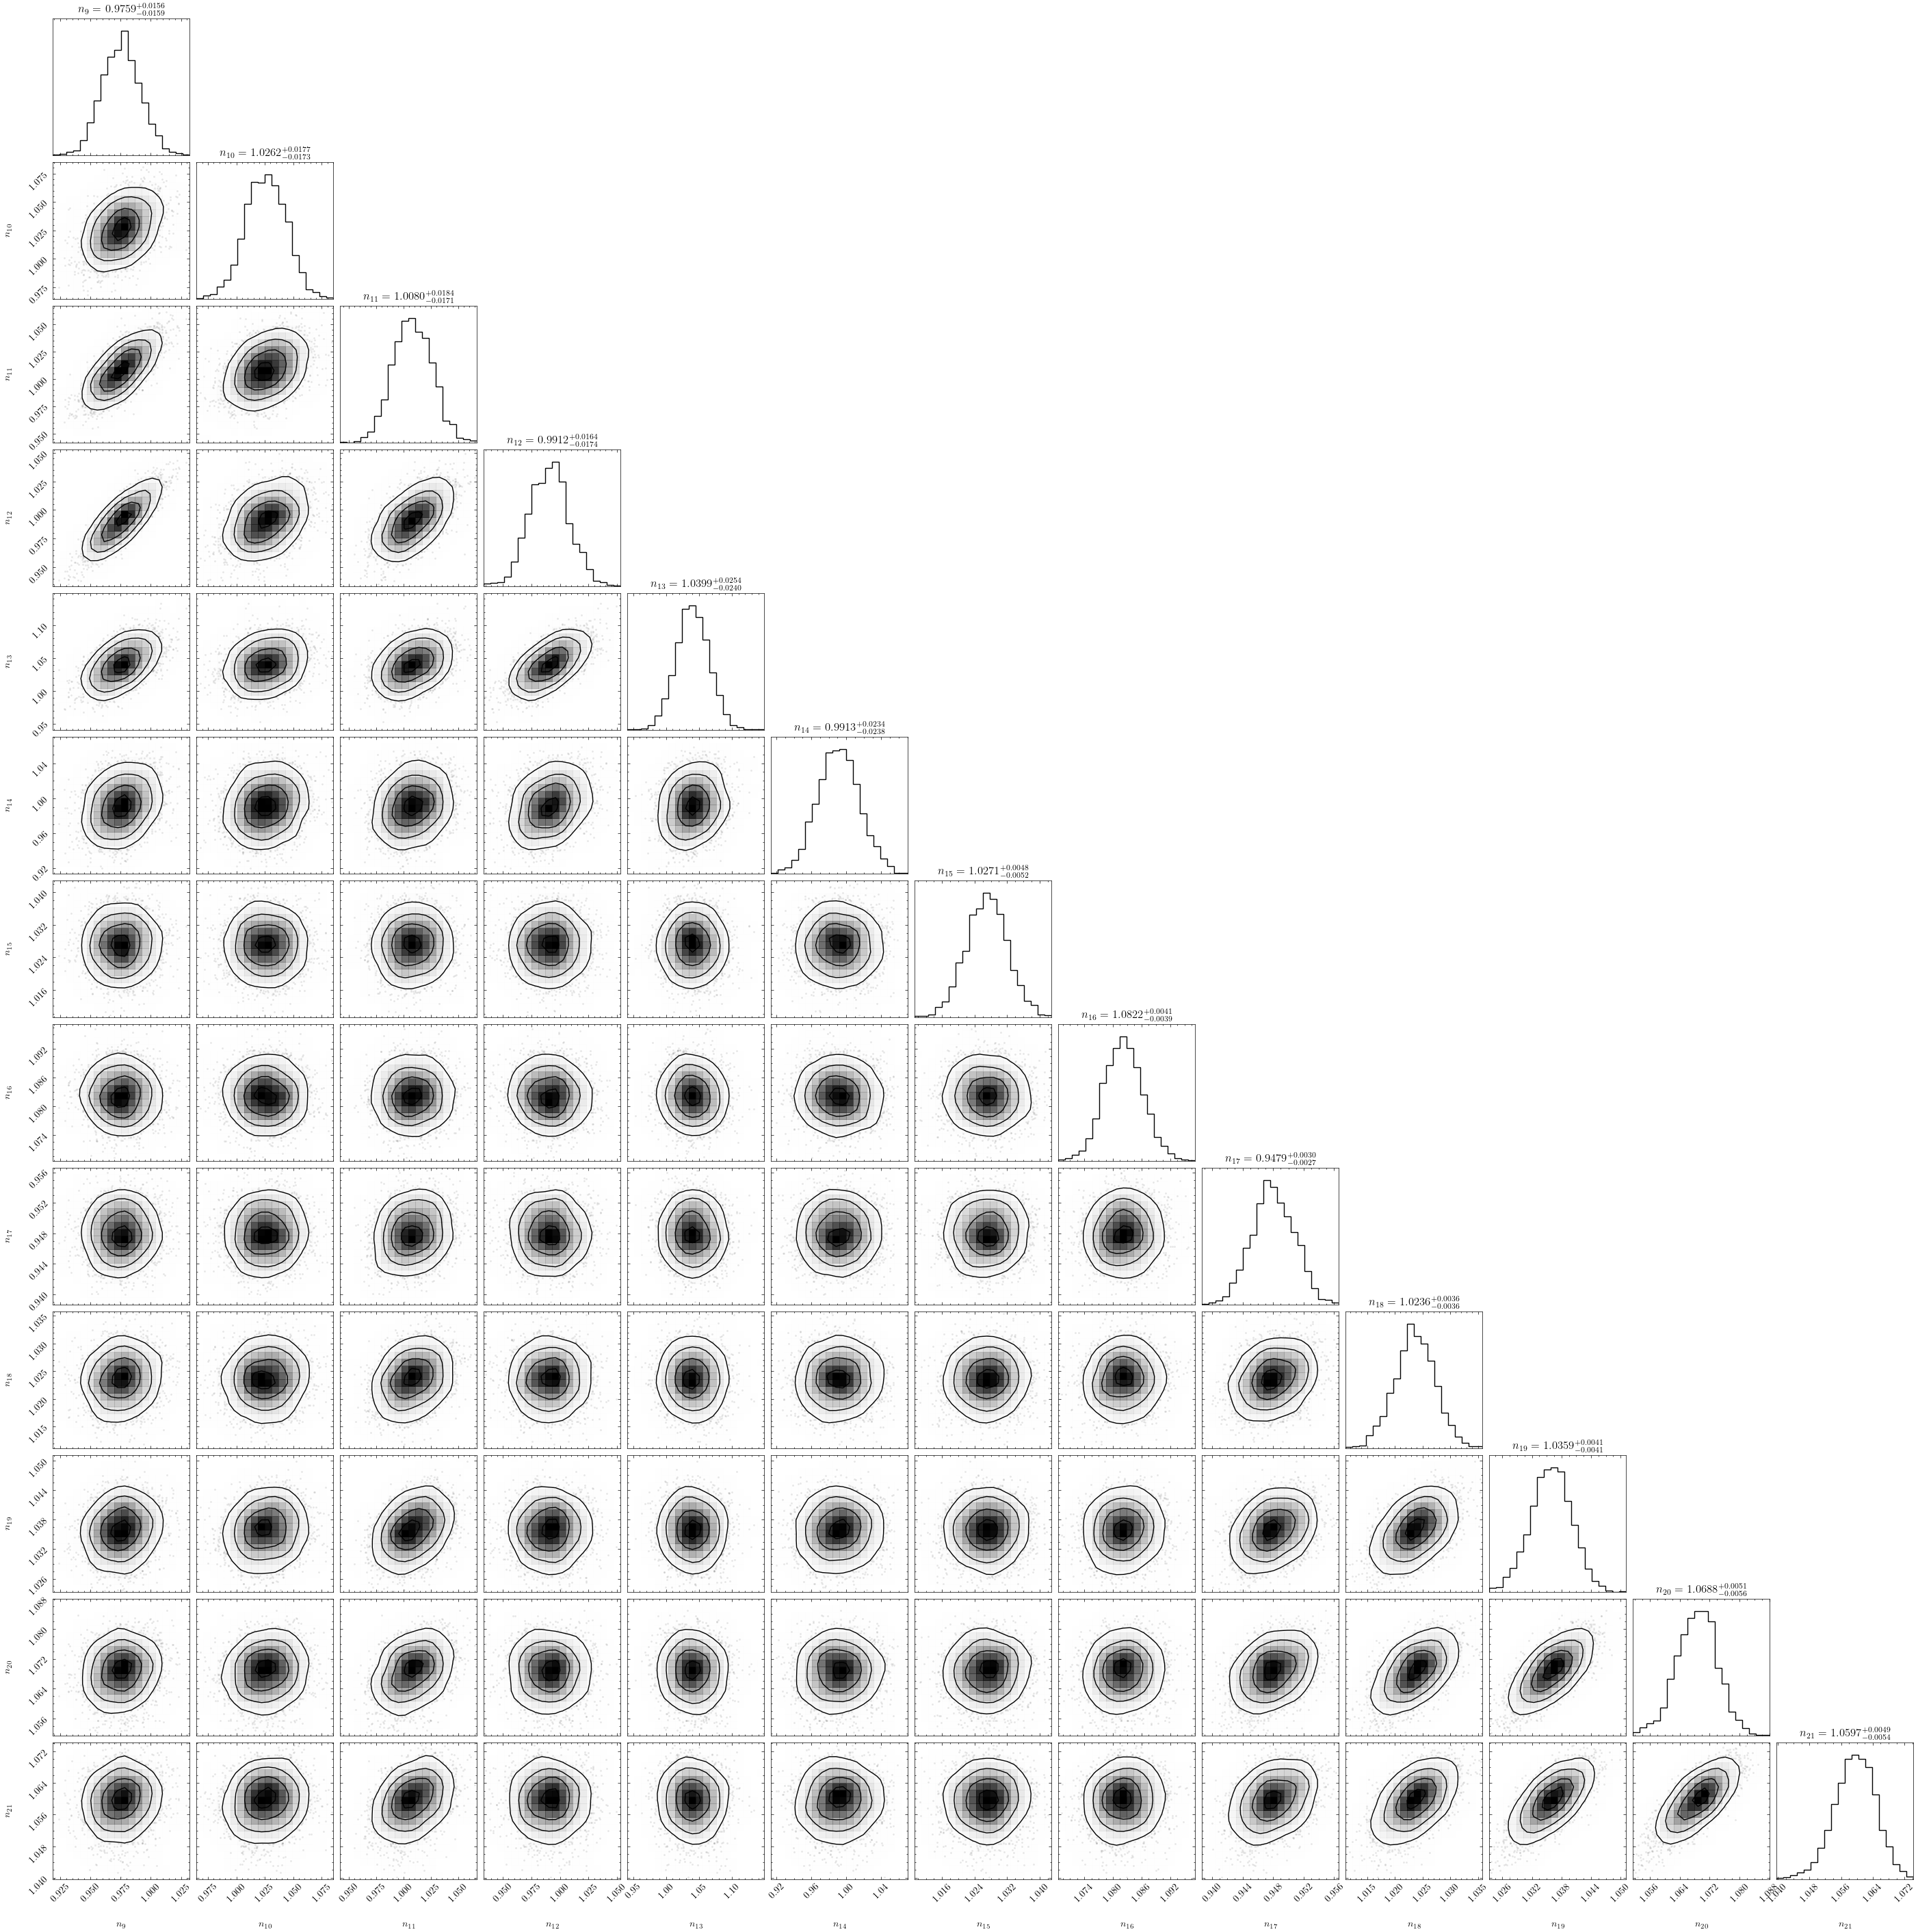

In [22]:
fig = corner(flat_chain[:, nrpar:], show_titles=True, smooth=True, labels=model.azr.config.labels[nrpar:],
             title_fmt='.4f')

In [23]:
np.save('model_b1.npy', flat_chain)

In [24]:
# files = ['AZUREOut_aa=1_R=1.out',
#          'AZUREOut_aa=1_R=2.out',
#          'AZUREOut_aa=1_TOTAL_CAPTURE.out']
# data = np.vstack([np.loadtxt('output/' + f) for f in files])
# np.savetxt('bare_uncertainties.txt', data[:, 6])

In [25]:
ii = np.argmax(lnp.flatten())

In [26]:
ii

19404

In [27]:
theta_star = np.savetxt('theta_star_b1.txt', backend.get_chain(flat=True)[ii])